In [1]:
import copy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import OrderedDict
from scipy.signal import savgol_filter
from utils.plot_utils import set_fontsize
from utils.binning_utils import bin_dataset_switching
from utils.hdf_utils import load_measurement_data_devices_attrs
from utils.plot_utils import plot_binned_dataset_switching
from utils.binning_utils import bin_data, find_nearest_idx, combine_arrays_irregular, \
                                average_binned_data, bin_dataset_switching

In [3]:
fname = "2020_11_17.hdf"
dset_name = "1605659946 RC P2 F1 with R0 F1 det J1 J2 microwaves"

devices = ()

In [4]:
pmt_channel = 1
shutter_channel = 2

pxie, pxie_time, pxie_attrs, data_devices = load_measurement_data_devices_attrs(fname, dset_name, devices)

In [5]:
pmt_data = -np.array([pxie[idx][:,pmt_channel].astype(float) for idx in range(1,len(pxie)+1)])
pmt_data -= pmt_data[:,150:250].mean(axis = 1)[:, np.newaxis]
shutter_data = np.array([pxie[idx][:,shutter_channel].mean() for idx in range(1,len(pxie)+1)])

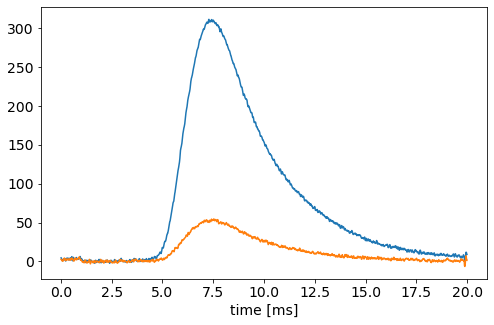

In [7]:
_t = np.linspace(1,1999,2000)/1e2
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(_t, pmt_data[::2].mean(axis = 0))
ax.plot(_t, pmt_data[1::2].mean(axis = 0))

ax.set_xlabel('time [ms]')
set_fontsize(ax, 14)

In [9]:
np.trapz(pmt_data[::2].mean(axis = 0)[200:])/np.trapz(pmt_data[1::2].mean(axis = 0)[200:])

5.911250924189887

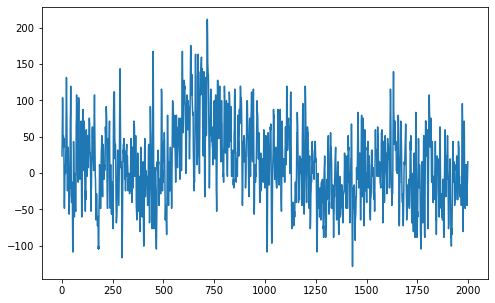

In [20]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(pmt_data[1::2][:1].mean(axis = 0))

In [161]:
reshape_size = 4
trace_len = 2000
slice_open = np.s_[::2]
slice_closed = np.s_[1::2]

data_open = pmt_data[slice_open][:reshape_size*((len(pmt_data)//2)//reshape_size)].reshape(-1,reshape_size,trace_len).mean(axis = 1)
data_closed = pmt_data[slice_closed][:reshape_size*((len(pmt_data)//2)//reshape_size)].reshape(-1,reshape_size,trace_len).mean(axis = 1)

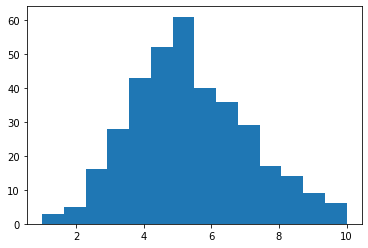

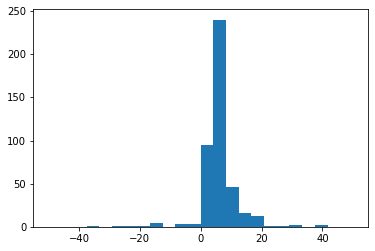

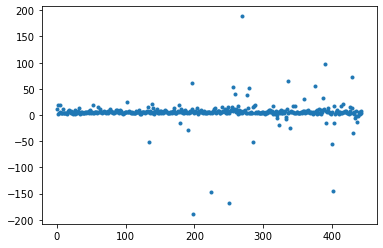

In [162]:
ratios = np.trapz(data_open, axis = 1)/np.trapz(data_closed, axis = 1)
plt.hist(ratios, bins = np.linspace(1,10,15));
plt.figure()
plt.hist(ratios, bins = np.linspace(-50,50,25));

plt.figure()
plt.plot(ratios, '.')

In [163]:
filter_mask = np.abs(ratios - np.mean(ratios)) < 5*np.std(ratios)

In [164]:
filter_mask.sum()/filter_mask.size

0.9887387387387387

In [165]:
np.mean(ratios[filter_mask])

6.624718177942552

In [166]:
integrals_open = np.trapz(data_open, axis = 1)
integrals_closed = np.trapz(data_closed, axis = 1)

In [169]:
integrals_mask = integrals_closed > 10e3

(array([ 10.,  72., 116.,  93.,  36.,  18.,  17.,   5.,   2.,   4.]),
 array([ 0.93882932,  2.43443131,  3.9300333 ,  5.42563529,  6.92123728,
         8.41683927,  9.91244125, 11.40804324, 12.90364523, 14.39924722,
        15.89484921]),
 <BarContainer object of 10 artists>)

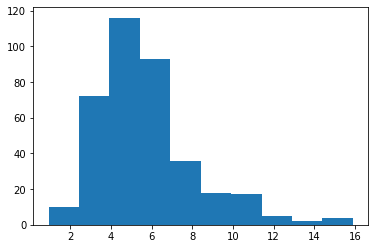

In [170]:
plt.hist(integrals_open[integrals_mask]/integrals_closed[integrals_mask])

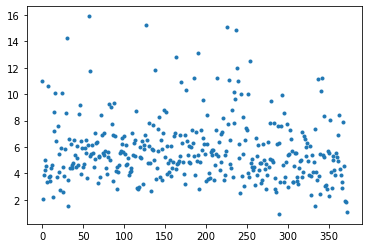

In [171]:
plt.plot(integrals_open[integrals_mask]/integrals_closed[integrals_mask], '.')

In [172]:
np.mean(integrals_open[integrals_mask]/integrals_closed[integrals_mask])

5.741440795438083

In [ ]:
gauss